In [33]:
%matplotlib notebook
import numpy as np
from numba import jit
from potentials import *
from vv import vvJ
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [60]:
#declare global variables
max_a = 5
min_a = 0
n_atoms = 20
dim = 2

sigma = 2
eps = 10
beta = 1
k = 5
q = 1

In [61]:
def pot_gradient(coord):
    return gradients.LJ(coord, sigma, eps) - gradients.harmonic(coord,0, k)

In [66]:
r_init = 5*np.random.normal(size=(5,2))
vel_init = np.zeros_like(r_init) 
r_matrix, v_matrix, a_matrix=vvJ(pot_gradient, r_init, vel_init, 1, 10, 0.001)

<IPython.core.display.Javascript object>


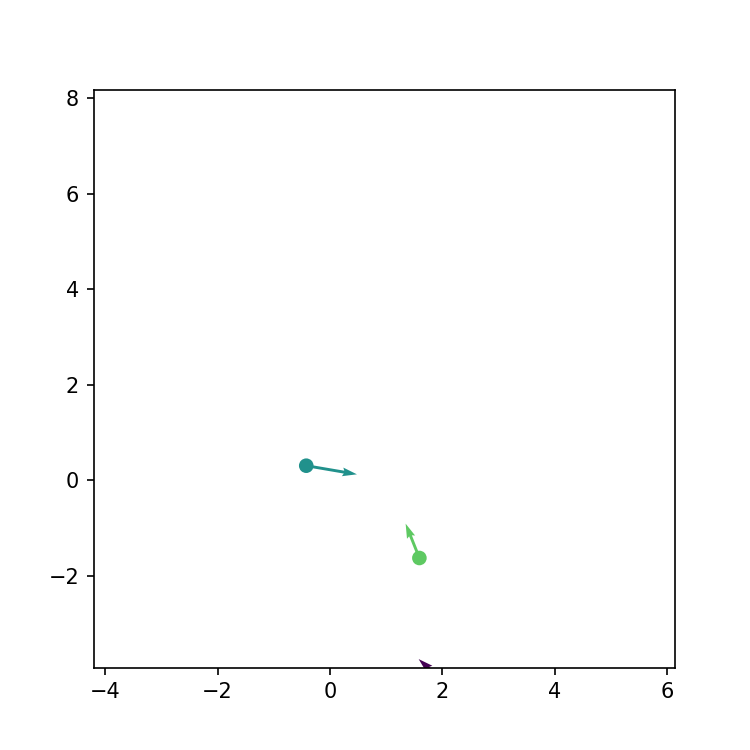

In [75]:
fig, ax = plt.subplots(figsize=(5, 5))
scat = ax.scatter(r_matrix[0,:,0], r_matrix[0,:,1], c=np.arange(len(r_init)))
qax = ax.quiver(r_matrix[0,:,0], r_matrix[0,:,1], v_matrix[1,:,0], v_matrix[1,:,1],np.arange(len(r_init)),scale=100, width=0.005)
#ax.set_xlim(np.max([-10,np.min(r_matrix[:,:,0])]),np.min([10,np.max(r_matrix[:,:,0])]))
#ax.set_ylim(np.max([-10,np.min(r_matrix[:,:,1])]),np.min([10,np.max(r_matrix[:,:,1])]))

def animate(i):
    index = 2*i
    data = r_matrix[index]
    scat.set_offsets(data)
    qax.set_UVC(v_matrix[index,:,0],v_matrix[index,:,1])
    qax.set_offsets(data)

anim = animation.FuncAnimation(fig, animate, interval=20, repeat=True)